<a href="https://colab.research.google.com/github/finalYearProject23/test/blob/main/code_CMP9139_UsamaAhmed_29523887.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define your dataset folder path dynamically
base_path = '/content/drive/MyDrive/Ahmed/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1 – Import Required Libraries**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


**Step 2 – Load Dataset Dynamically**


In [ ]:
from pathlib import Path
import pandas as pd

# Paths
data_file = list(Path(base_path).glob('adult.data'))[0]
names_file = list(Path(base_path).glob('adult.names'))[0]

# Load dataset
df = pd.read_csv(data_file, header=None, na_values='?', skipinitialspace=True)

# Manually specify correct column names (official UCI names)
col_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
]
df.columns = col_names + ['income']  # target column

print("Shape:", df.shape)
df.head()


Shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Step 3 – Dataset Overview (Appendix Table A1)**


In [ ]:
info_df = pd.DataFrame({
    "Attribute": df.columns,
    "Data Type": df.dtypes.values,
    "Non-Null Count": df.notnull().sum().values
})
info_df


,Attribute,Data Type,Non-Null Count
0,age,int64,32561
1,workclass,object,30725
2,fnlwgt,int64,32561
3,education,object,32561
4,education-num,int64,32561
5,marital-status,object,32561
6,occupation,object,30718
7,relationship,object,32561
8,race,object,32561
9,sex,object,32561


**Step 4 – Missing Data Summary (Appendix Table A2)**

In [ ]:
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ["Attribute", "Missing_Values"]
missing_summary['Missing_Percent'] = (missing_summary['Missing_Values'] / len(df)) * 100
missing_summary


,Attribute,Missing_Values,Missing_Percent
0,age,0,0.000000
1,workclass,1836,5.638647
2,fnlwgt,0,0.000000
3,education,0,0.000000
4,education-num,0,0.000000
5,marital-status,0,0.000000
6,occupation,1843,5.660146
7,relationship,0,0.000000
8,race,0,0.000000
9,sex,0,0.000000


**Step 5: Data Cleaning**

In [ ]:
# Clean missing rows
df_clean = df.dropna()

# Strip spaces from string columns
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip()

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


/tmp/ipython-input-269985933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].str.strip()


### **Appendix Phase 2 – Descriptive Statistics & Visualizations**


Step 1 – Generate Descriptive Statistics (Table A3)
**bold text**

In [ ]:
# Descriptive statistics for numerical columns
desc_stats = df.describe().T
desc_stats = desc_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
desc_stats.reset_index(inplace=True)
desc_stats.rename(columns={'index': 'Attribute'}, inplace=True)

desc_stats

,Attribute,count,mean,std,min,25%,50%,75%,max
0,age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
1,fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
2,education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
3,capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
4,capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
5,hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


**Step 2 – Frequency Counts for Key Categorical Variables (Table A4)**


In [ ]:
# Frequency table for categorical columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

freq_tables = {}
for col in categorical_cols:
    freq_tables[col] = df[col].value_counts().reset_index()
    freq_tables[col].columns = [col, 'Count']

# Example output for 'sex'
freq_tables['sex']


,sex,Count
0,Male,21790
1,Female,10771


**Step 3 – Visualize Gender Distribution**

/tmp/ipython-input-3382386005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='Set2')


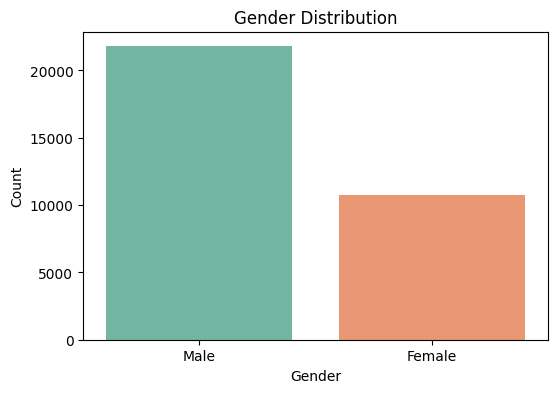

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Step 4 – Visualize Income Distribution
**bold text**

/tmp/ipython-input-1362899103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='income', palette='Set1')


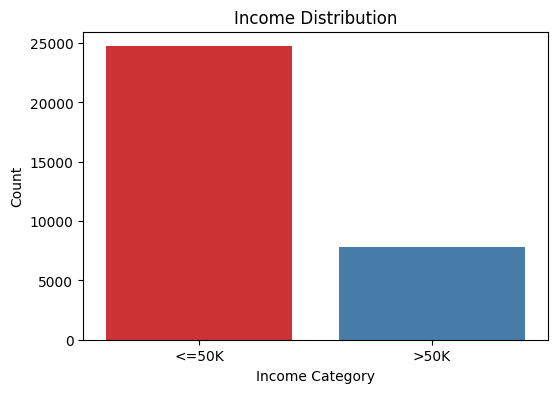

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income', palette='Set1')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()


Step 5 – Cross-tab Gender vs Income (For Hypothesis 1)
**bold text**

In [ ]:
gender_income_table = pd.crosstab(df['sex'], df['income'])
gender_income_table


income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


# Appendix Phase 3 – Exploratory Visualizations

Step 1 – Set Visualization Style (IEEE-friendly)
**bold text**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Global style settings
sns.set_theme(style="whitegrid", palette="Blues_d")
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 11


**Step 2 – Histograms for Key Numeric Attributes**


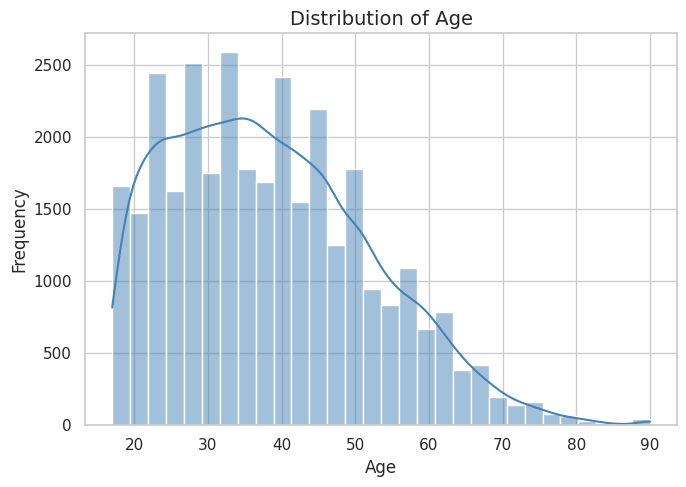

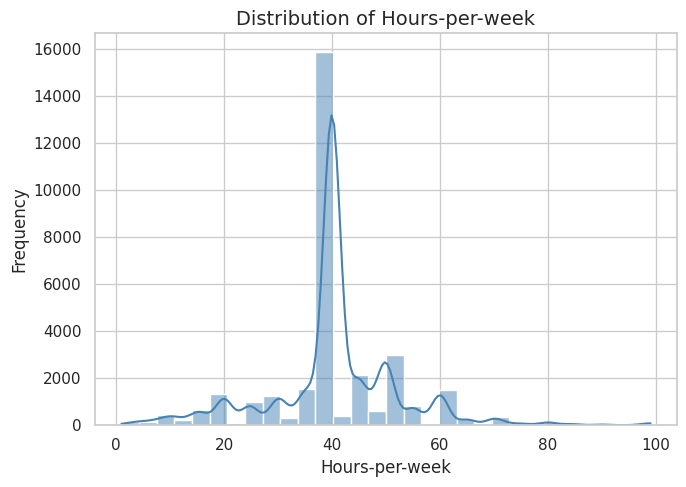

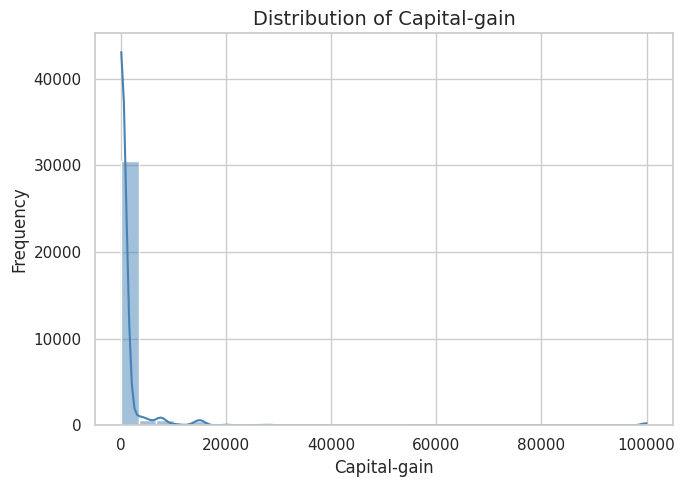

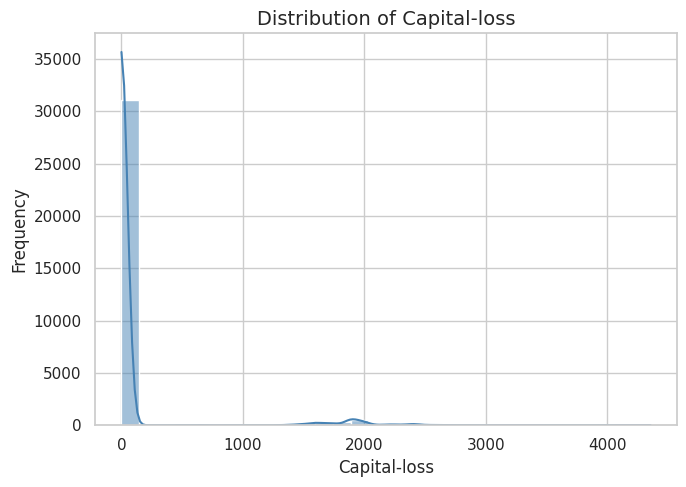

In [ ]:
numeric_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


Figures A3-A6: Histograms for numeric attributes (Age, Hours/week, Capital Gain, Capital Loss).



---



Step 3 – Boxplots for Age vs Income


/tmp/ipython-input-3467938150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y='age', palette='Blues')


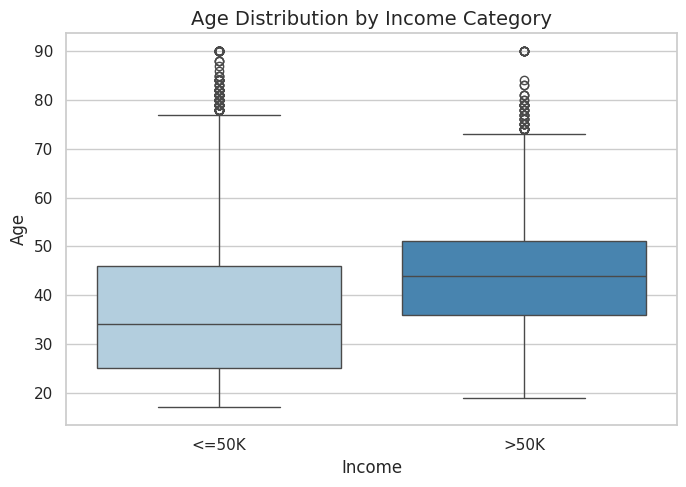

In [ ]:
plt.figure()
sns.boxplot(data=df, x='income', y='age', palette='Blues')
plt.title('Age Distribution by Income Category')
plt.xlabel('Income')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


Step 4 – Boxplot for Hours-per-week vs Income
**bold text**

/tmp/ipython-input-2443791939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y='hours-per-week', palette='Blues')


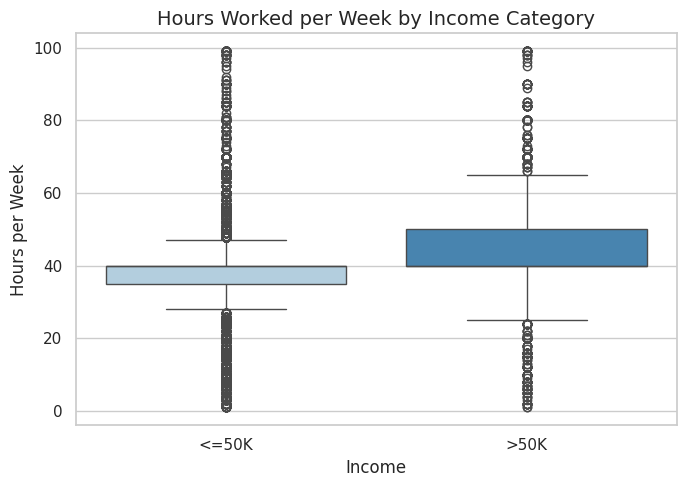

In [ ]:
plt.figure()
sns.boxplot(data=df, x='income', y='hours-per-week', palette='Blues')
plt.title('Hours Worked per Week by Income Category')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.tight_layout()
plt.show()


Step 5 – Correlation Heatmap for Numeric Features
**bold text**

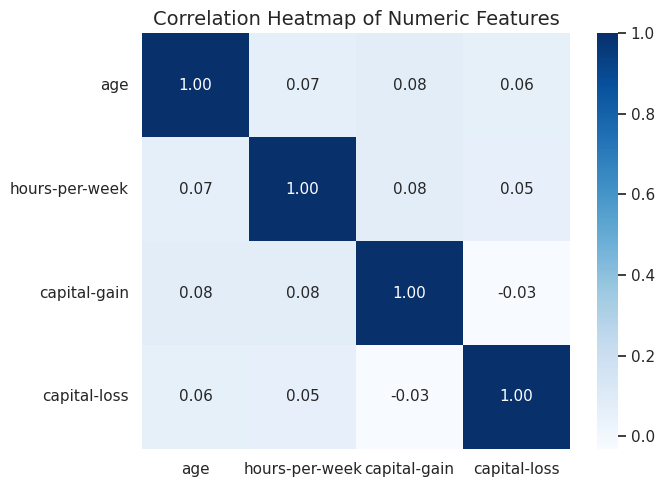

In [ ]:
plt.figure()
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


Step 6 – Stacked Bar Plot: Education Level vs Income
**bold text**

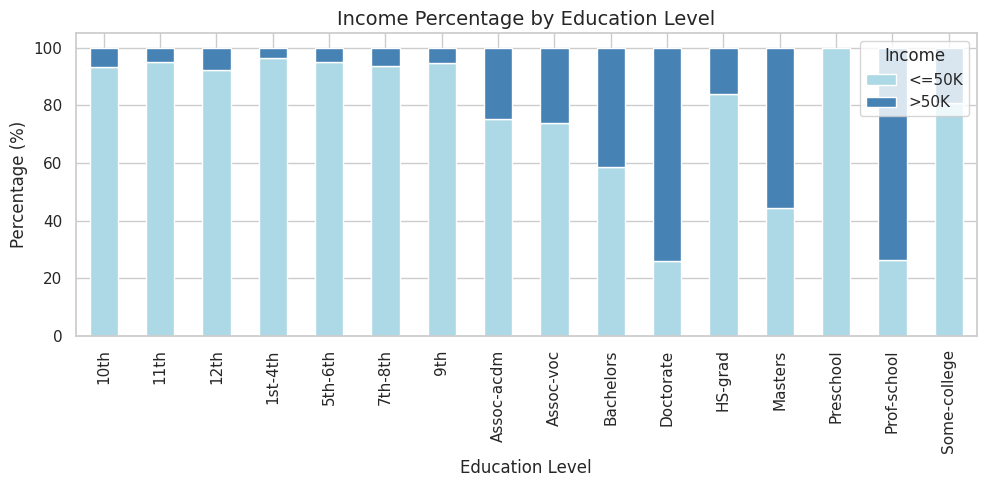

In [ ]:
edu_income = pd.crosstab(df['education'], df['income'], normalize='index')*100
edu_income.plot(kind='bar', stacked=True, figsize=(10,5), color=['lightblue', 'steelblue'])

plt.title('Income Percentage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()


**Appendix Phase 4 – Hypotheses Testing (Inferential Statistics)**

**Step 1 – Hypothesis 1: Gender vs Income (Chi-square Test)**

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
gender_income_ct = pd.crosstab(df['sex'], df['income'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(gender_income_ct)

# Store results in a table
chi_results = pd.DataFrame({
    'Chi-square Statistic': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})
chi_results


,Chi-square Statistic,p-value,Degrees of Freedom
0,1517.813409,0.0,1


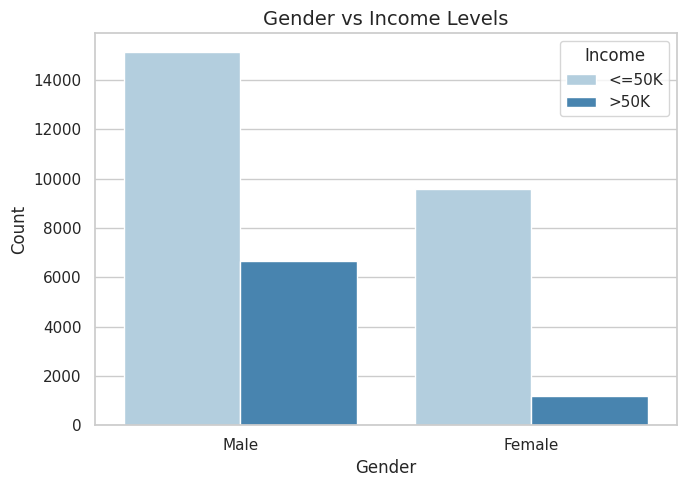

In [ ]:
sns.countplot(data=df, x='sex', hue='income', palette='Blues')
plt.title('Gender vs Income Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Income')
plt.tight_layout()
plt.show()


**Step 2 – Hypothesis 2: Age Difference by Income Group (T-test)**

In [ ]:
from scipy.stats import ttest_ind

# Split groups
low_income_age = df[df['income'] == '<=50K']['age']
high_income_age = df[df['income'] == '>50K']['age']

# Independent t-test
t_stat, p_val = ttest_ind(low_income_age, high_income_age, equal_var=False)

t_results = pd.DataFrame({
    'T-statistic': [t_stat],
    'p-value': [p_val],
    'Mean Age <=50K': [low_income_age.mean()],
    'Mean Age >50K': [high_income_age.mean()]
})
t_results


,T-statistic,p-value,Mean Age <=50K,Mean Age >50K
0,-50.26421,0.0,36.783738,44.249841


/tmp/ipython-input-2871444845.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y='age', palette='Blues')


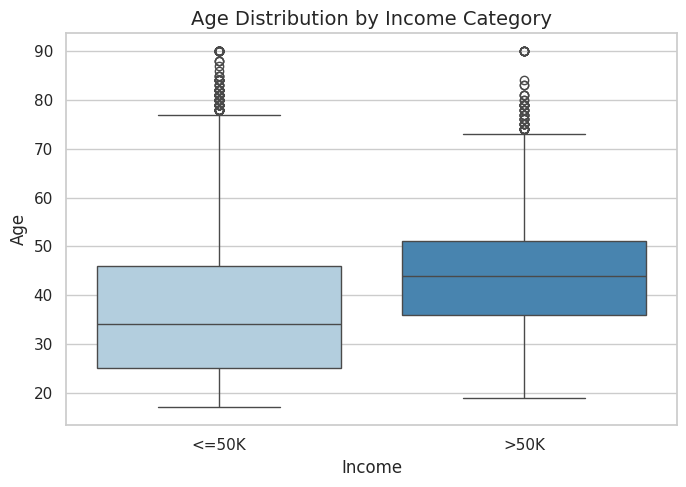

In [ ]:
sns.boxplot(data=df, x='income', y='age', palette='Blues')
plt.title('Age Distribution by Income Category')
plt.xlabel('Income')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


**Step 3 – Hypothesis 3: Education & Hours Effect on Income (Logistic Regression)**


In [ ]:
import statsmodels.api as sm

# Encode target variable
df_lr = df.copy()
df_lr['income'] = df_lr['income'].apply(lambda x: 1 if x=='>50K' else 0)

# Select predictors
X = df_lr[['education-num', 'hours-per-week']]
y = df_lr['income']

# Add constant term
X = sm.add_constant(X)

# Logistic regression model
model = sm.Logit(y, X).fit()
log_results = model.summary2().tables[1]
log_results


Optimization terminated successfully.
         Current function value: 0.471670
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-6.538070,0.088971,-73.485298,0.000000e+00,-6.712450,-6.363689
education-num,0.346118,0.006394,54.132805,0.000000e+00,0.333586,0.358650
hours-per-week,0.040720,0.001233,33.016178,4.759449e-239,0.038303,0.043137


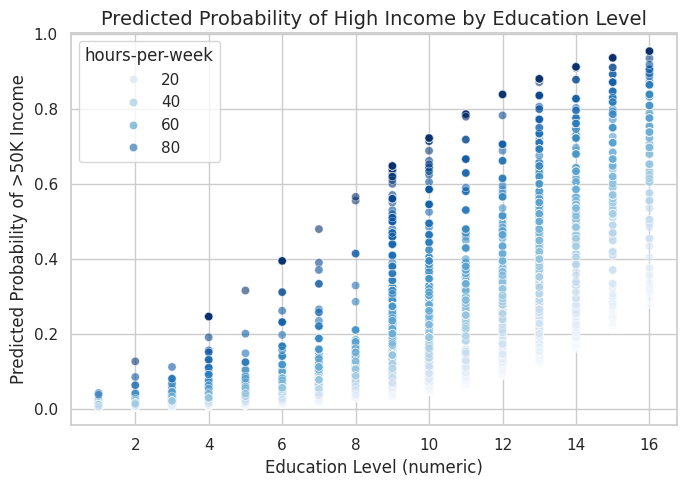

In [ ]:
# Predicted probabilities
df_lr['predicted_prob'] = model.predict(X)

sns.scatterplot(data=df_lr, x='education-num', y='predicted_prob', hue='hours-per-week', palette='Blues', alpha=0.6)
plt.title('Predicted Probability of High Income by Education Level')
plt.xlabel('Education Level (numeric)')
plt.ylabel('Predicted Probability of >50K Income')
plt.colorbar
plt.tight_layout()
plt.show()

# **Appendix Phase 5 – Bayesian Logistic Regression**

**Step 1 – Install and Import PyMC3 (Bayesian Library)**

PyMC installed successfully!


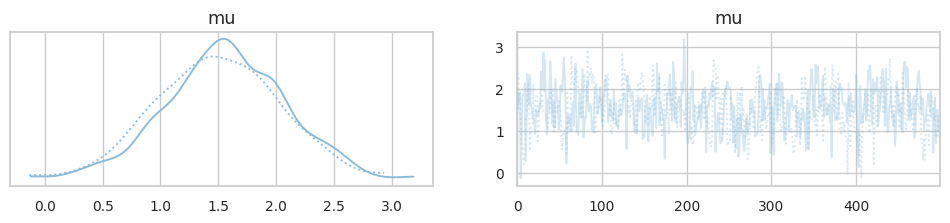

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

print("PyMC installed successfully!")

with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=[1,2,3])
    trace = pm.sample(500, tune=500, chains=2, cores=1, target_accept=0.9)

az.plot_trace(trace)
plt.show()


In [ ]:
import scipy.signal as signal
import numpy as np

# Add back the deprecated gaussian function if missing
if not hasattr(signal, "gaussian"):
    def gaussian(M, std):
        n = np.arange(0, M) - (M - 1.0) / 2
        return np.exp(-0.5 * (n / std) ** 2)
    signal.gaussian = gaussian

import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

print("PyMC + ArviZ + tsfresh successfully loaded")


PyMC + ArviZ + tsfresh successfully loaded


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>]],
      dtype=object)

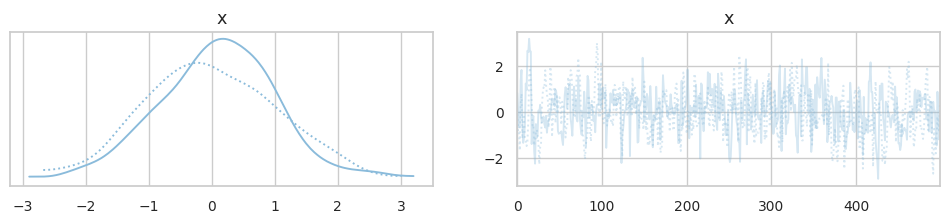

In [ ]:
with pm.Model() as model:
    x = pm.Normal("x", mu=0, sigma=1)
    trace = pm.sample(500, tune=500, chains=2, target_accept=0.9)

az.plot_trace(trace)

**Step 2 – Prepare Data for Bayesian Analysis**


In [ ]:
# Dataset copy
bayes_df = df_lr[['education-num', 'hours-per-week', 'income']]

# Standardize predictors for better model convergence
X_std = (bayes_df[['education-num', 'hours-per-week']] - bayes_df[['education-num', 'hours-per-week']].mean()) / bayes_df[['education-num', 'hours-per-week']].std()
y = bayes_df['income'].values

**Step 3 – Define Bayesian Logistic Regression Model**


In [ ]:
with pm.Model() as logistic_model:
    # Priors for coefficients
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    beta_edu = pm.Normal('Beta_Education', mu=0, sigma=10)
    beta_hours = pm.Normal('Beta_Hours', mu=0, sigma=10)

    # Logistic model
    logit_p = intercept + beta_edu * X_std['education-num'] + beta_hours * X_std['hours-per-week']
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))

    # Likelihood
    observed = pm.Bernoulli('Observed', p=p, observed=y)

    # Sampling
    trace = pm.sample(2000, tune=1000, cores=2, chains=2, target_accept=0.95, random_seed=42)

**Step 4 – Posterior Summary Table**

In [ ]:
summary = az.summary(trace, hdi_prob=0.95)
summary


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.402,0.016,-1.433,-1.371,0.0,0.0,2719.0,2752.0,1.0
Beta_Education,0.890,0.017,0.859,0.923,0.0,0.0,3252.0,2870.0,1.0
Beta_Hours,0.503,0.015,0.474,0.532,0.0,0.0,3033.0,2738.0,1.0
p[0],0.399,0.005,0.390,0.408,0.0,0.0,3737.0,2759.0,1.0
p[1],0.181,0.006,0.169,0.193,0.0,0.0,2922.0,2575.0,1.0
...,...,...,...,...,...,...,...,...,...
p[32556],0.302,0.004,0.296,0.309,0.0,0.0,3367.0,2699.0,1.0
p[32557],0.143,0.002,0.138,0.147,0.0,0.0,2646.0,2577.0,1.0
p[32558],0.143,0.002,0.138,0.147,0.0,0.0,2646.0,2577.0,1.0
p[32559],0.069,0.002,0.064,0.073,0.0,0.0,2856.0,2526.0,1.0


**Step 5 – Plot Posterior Distributions**

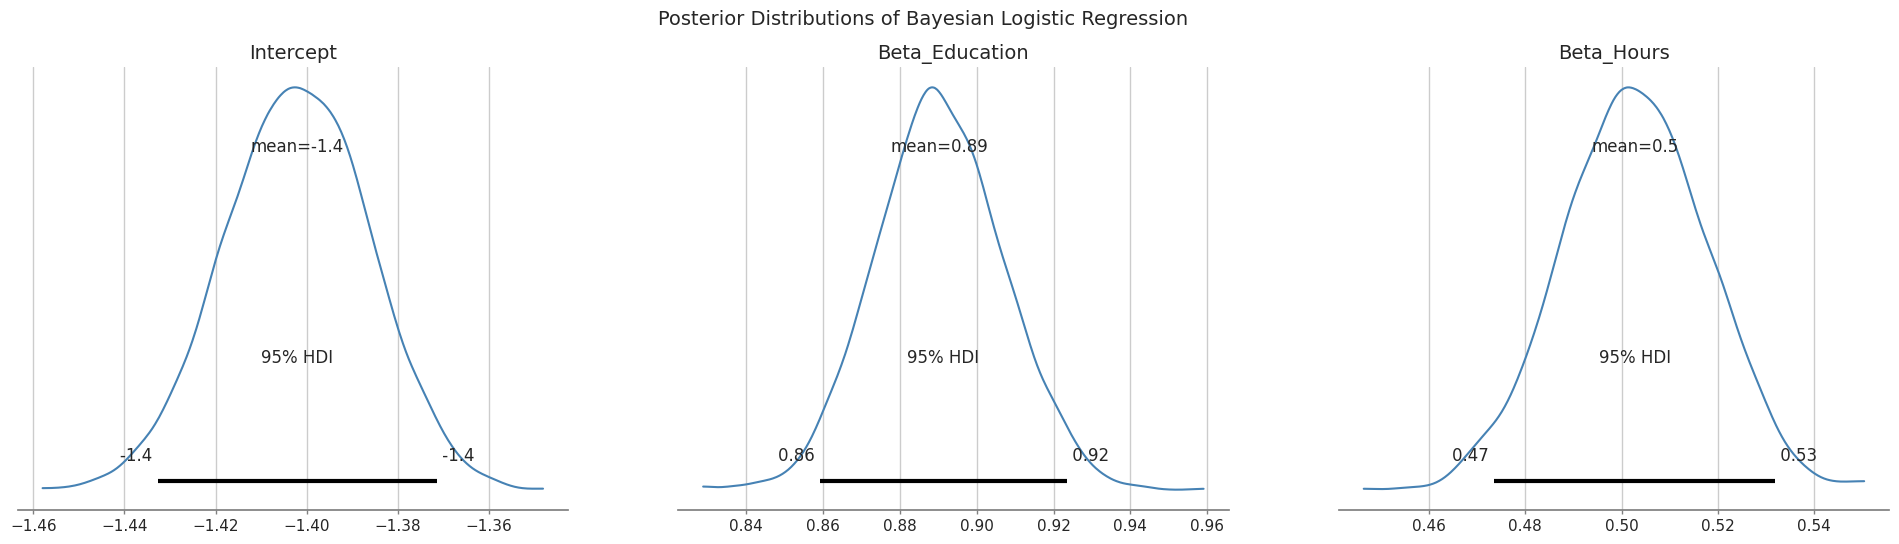

In [ ]:
az.plot_posterior(trace, var_names=['Intercept', 'Beta_Education', 'Beta_Hours'], hdi_prob=0.95, color='steelblue')
plt.suptitle('Posterior Distributions of Bayesian Logistic Regression', fontsize=14)
plt.show()


**Step 6 – Plot Predicted Probability**

In [ ]:
!pip install --upgrade arviz==0.17.1


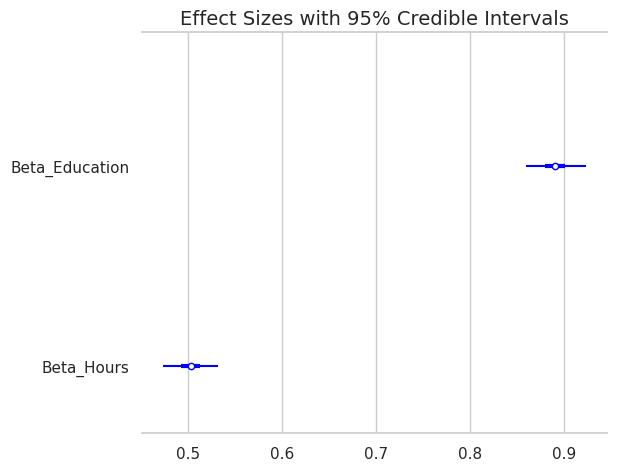

In [ ]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"

import arviz as az
import matplotlib.pyplot as plt

az.plot_forest(trace, var_names=['Beta_Education', 'Beta_Hours'], combined=True, hdi_prob=0.95, colors='blue')
plt.title('Effect Sizes with 95% Credible Intervals')
plt.show()
